# Loan Dataset Analysis

The dataset contains 367 entries for loan applications.

In [2]:
# import all necessary packages and set plots to be embedded inline
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Data Gathering

In [44]:
pd.read_csv(r"C:\Users\FORTUNE\Documents\Datasets\test_lAUu6dG.csv")
loan = pd.read_csv(r"C:\Users\FORTUNE\Documents\Datasets\test_lAUu6dG.csv")
loan.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban


In [43]:
#overall scope of the dataset
print (loan.isnull().sum())
print (loan.describe())
print (loan.info())

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       367.000000         367.000000  362.000000        361.000000   
mean       4805.599455        1569.577657  136.132597        342.537396   
std        4910.685399        2334.232099   61.366652         65.156643   
min           0.000000           0.000000   28.000000          6.000000   
25%        2864.000000           0.000000  100.250000        360.000000   
50%        3786.000000        1025.000000  125.000000        360.000000   
75%        5060.000000        2430.500000  158.000000        360.000000   
max       72529.000000       24000.000000  550.000000        480.000000   

       Credit_History  

The dataset contains 367 entries for loan applications. The features includes Loan_ID, Gender, Marrital status, education and other loan details. There are 11 null values under the gender column, 10 null values under dependents, 23 null values under self-employed, 5 null values under loan amounts, 6 under loan amount term and 29 under credit history. The aim of my exploration is to answer some questions

- The relationship between income and nature of employment.
- Credit history and frequency of unemployed rural dwellers taking loans. 
- Relationship between education and credit history and how does it affect loan amount. 
- Does Marital status affect the Loan amount. 
- The percentage of married men who take loans compared to single women
- Comparison between married woman and single women
- How does property area affect loan amount and credit score
- Difference between loans taken by applicants with an earning coapplicant and other without

## Cleaning

##### Define

##### Quality issues
- Null values
- Loan amount and loan amount term as integers

##### Tidyness issues
- Primary Key not set as Loan ID.

##### Code

In [41]:
#Duplicate dataset before cleaning
loann = loan.copy()

In [45]:
#address null values in Dataset.
loann['Gender'].fillna(loann['Gender'].mode()[0], inplace=True)
loann['Dependents'].fillna(loann['Dependents'].mode()[0], inplace=True)
loann['Self_Employed'].fillna(loann['Self_Employed'].mode()[0], inplace=True)
loann.LoanAmount.fillna(value = 0 , inplace = True)
loann.Loan_Amount_Term.fillna(value = 0 , inplace = True)
loann.fillna(value = "Not available", inplace = True)

In [46]:
#convert "Loan amount" and "loan amount term" to integers
loann = loann.astype({'LoanAmount':'int'})
loann = loann.astype({'Loan_Amount_Term':'int'})

In [8]:
#loan ID as primary Key
loann.set_index("Loan_ID", inplace = True)

#### Test

In [56]:
loann.info()

<class 'pandas.core.frame.DataFrame'>
Index: 367 entries, LP001015 to LP002989
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Gender             367 non-null    object
 1   Married            367 non-null    object
 2   Dependents         367 non-null    object
 3   Education          367 non-null    object
 4   Self_Employed      367 non-null    object
 5   ApplicantIncome    367 non-null    int64 
 6   CoapplicantIncome  367 non-null    int64 
 7   LoanAmount         367 non-null    int32 
 8   Loan_Amount_Term   367 non-null    int32 
 9   Credit_History     367 non-null    object
 10  Property_Area      367 non-null    object
dtypes: int32(2), int64(2), object(7)
memory usage: 31.5+ KB


In [57]:
loann.isnull().sum().sum()

0

In [47]:
loann.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
302,LP002654,Female,No,0,Graduate,Yes,14987,0,177,360,1.0,Rural
196,LP002090,Male,Yes,1,Graduate,No,4796,0,114,360,0.0,Semiurban
344,LP002876,Male,No,0,Graduate,No,6858,0,176,360,1.0,Rural
177,LP002009,Female,No,0,Graduate,No,2918,0,65,360,Not available,Rural
191,LP002064,Male,No,0,Graduate,No,4083,0,96,360,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126,360,1.0,Urban
317,LP002774,Male,Yes,0,Not Graduate,No,1700,2900,67,360,0.0,Urban
316,LP002769,Female,Yes,0,Graduate,No,4283,0,120,360,1.0,Rural
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100,360,Not available,Urban
220,LP002212,Male,Yes,0,Graduate,No,2166,2166,108,360,Not available,Urban


## Wrangling 

### Exploration

In [48]:
loann.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110,360,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126,360,1.0,Urban


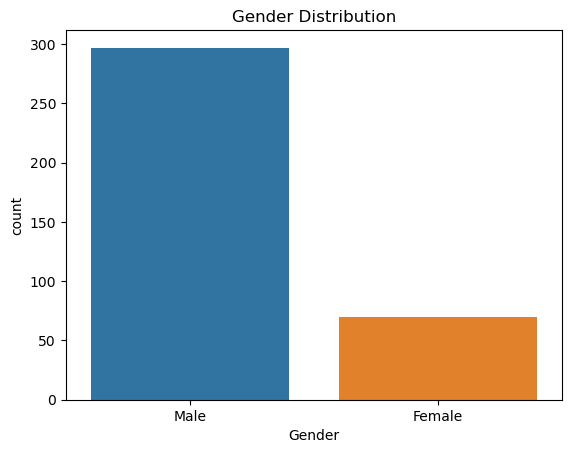

In [49]:
#Distribution of Gender
sb.countplot(data = loann, x = 'Gender').set_title('Gender Distribution');

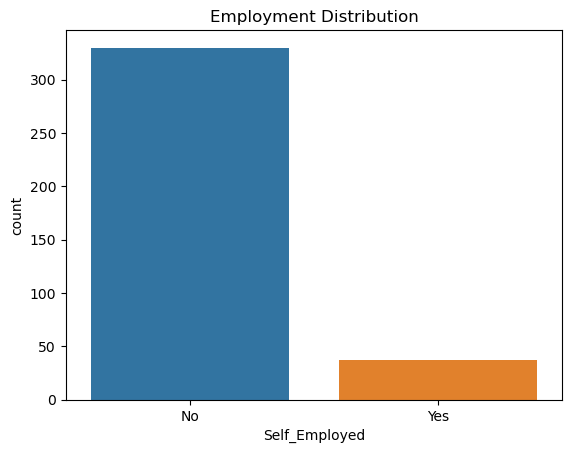

In [50]:
#Employment statistics
sb.countplot(data = loann, x = 'Self_Employed').set_title('Employment Distribution');

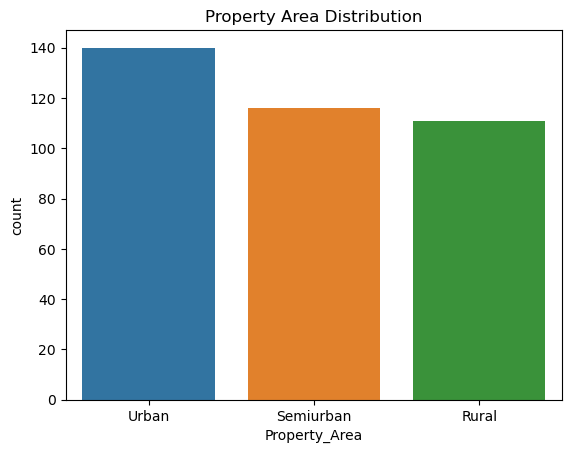

In [51]:
#Property Area Distrubution
sb.countplot(data = loann, x = 'Property_Area').set_title('Property Area Distribution');

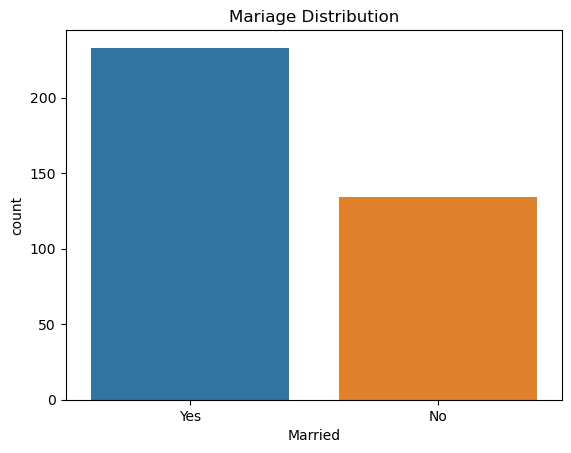

In [13]:
#Distribution of Marriage
sb.countplot(data = loann, x = 'Married').set_title('Mariage Distribution');

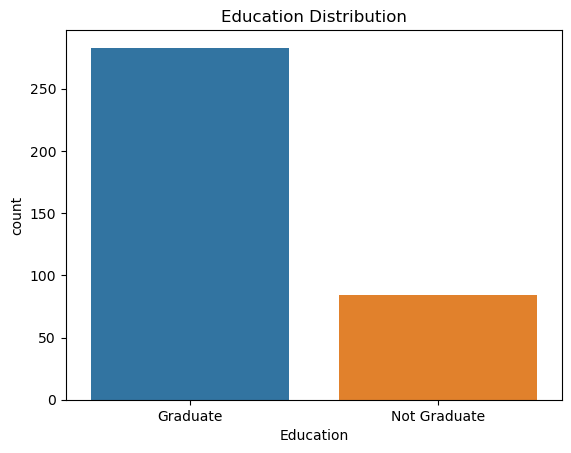

In [12]:
#Distribution of Education
sb.countplot(data = loann, x = 'Education').set_title('Education Distribution');

An overwhelming majority of the loan applicants are employed with very few who are self employed. Rural dwellers did not take loans as much as urban and semi-urban dwellers. The number of men who take loans are more then the number of women who take. Regardless of the mising values, it does not affect the lead the male participants have in the Dataset. As expected, most of the people involved in the loan were graduates as they are more likely to be aware of the existence of uch opportunites.

### Export for Visualization

In [52]:
loann.to_csv("loan_cleaned")